# Importing Libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
from sklearn.model_selection import KFold

In [3]:
NBAdatadf = pd.read_csv('/Users/Vishal/Desktop/edited final project data 1 - Sheet1.csv',converters={"Season":int})
#viewdf = NBAdatadf.loc[:, 'Unnamed: 0':'Unnamed: 30']
#viewdf
NBAdatadf

,Season,Lg,Age,Ht,Wt,G,FG,FGA,3P,3PA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,2020,NBA,26.1,6-6,217,1080,41.3,88.6,12.7,34.7,...,112.3,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
1,2019,NBA,26.1,6-6,218,1059,40.4,87.9,12.1,33.8,...,110.6,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
2,2018,NBA,26.3,6-6,219,1230,40.8,88.6,11.3,31.8,...,110.4,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4
3,2017,NBA,26.4,6-7,220,1230,40.5,87.9,10.7,29.6,...,108.6,0.460,0.362,0.767,97.3,0.521,13.0,22.3,0.193,108.6
4,2016,NBA,26.6,6-7,221,1230,40.2,88.0,9.9,27.8,...,108.8,0.457,0.358,0.772,96.4,0.514,12.7,23.3,0.209,108.8
5,2015,NBA,26.7,6-7,222,1230,39.6,87.6,8.8,25.0,...,106.4,0.452,0.354,0.757,95.8,0.502,13.2,23.8,0.209,106.4
6,2014,NBA,26.7,6-7,223,1230,39.6,88.3,8.3,23.7,...,105.6,0.449,0.350,0.750,93.9,0.496,13.3,25.1,0.205,105.6
7,2013,NBA,26.5,6-7,223,1230,39.8,87.6,8.2,22.7,...,106.6,0.454,0.360,0.756,93.9,0.501,13.6,25.5,0.215,106.6
8,2012,NBA,26.7,6-7,223,1229,40.1,88.5,7.7,21.5,...,105.8,0.453,0.359,0.753,92.0,0.496,13.7,26.5,0.204,105.8
9,2011,NBA,26.6,6-7,223,990,39.6,88.5,7.0,20.0,...,104.6,0.448,0.349,0.752,91.3,0.487,13.8,27.0,0.208,104.6


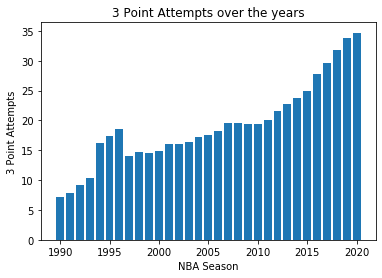

In [5]:
#Horizontal Bar graph (year vs 3 point attempts)
plt.bar(NBAdatadf['Season'], NBAdatadf['3PA'])
plt.xlabel('NBA Season')
plt.ylabel('3 Point Attempts')
plt.title('3 Point Attempts over the years')
plt.show()

In [ ]:
#Double lined graph (year vs number) - two variables graphed will be pace and ratio of 3 pointers to total shot attempts

In [ ]:
#Line graph - offensive rating and points per game (year vs offensive rating) and (year vs points per game)

In [ ]:
#Stacked bar graph (year vs (3pts and (total shot attempts - 3pt)

array([29.79879032, 29.09177419, 28.38475806, 27.67774194, 26.97072581,
       26.26370968, 25.55669355, 24.84967742, 24.14266129, 23.43564516,
       22.72862903, 22.0216129 , 21.31459677, 20.60758065, 19.90056452,
       19.19354839, 18.48653226, 17.77951613, 17.0725    , 16.36548387,
       15.65846774, 14.95145161, 14.24443548, 13.53741935, 12.83040323,
       12.1233871 , 11.41637097, 10.70935484, 10.00233871,  9.29532258,
        8.58830645])

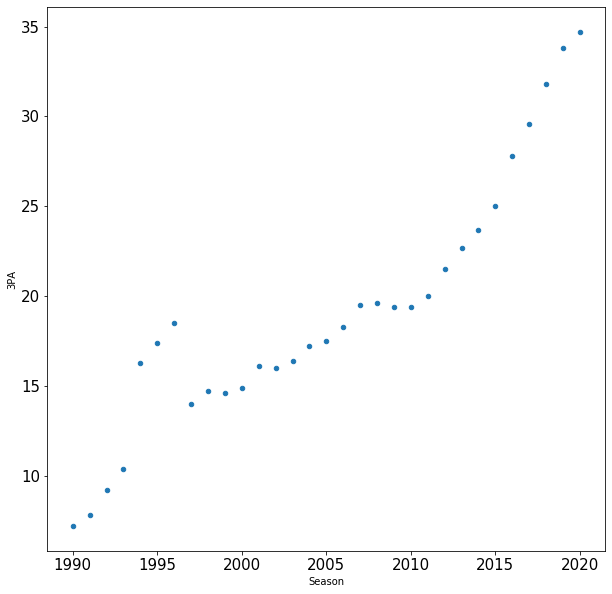

In [6]:
#Using linear regression, we want to predict future three points per game, 3 pt attempts, pace in the future seasons
t_train = NBAdatadf
t_test = NBAdatadf
t_train.plot.scatter(x="Season", y="3PA",fontsize = 15,figsize = (10,10))


t_train = t_train[t_train['3PA'].notna()]
t_test = t_train[t_train['3PA'].notna()]

X_train = t_train[["Season"]]
X_test = t_test[["Season"]]
y_train = t_train["3PA"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

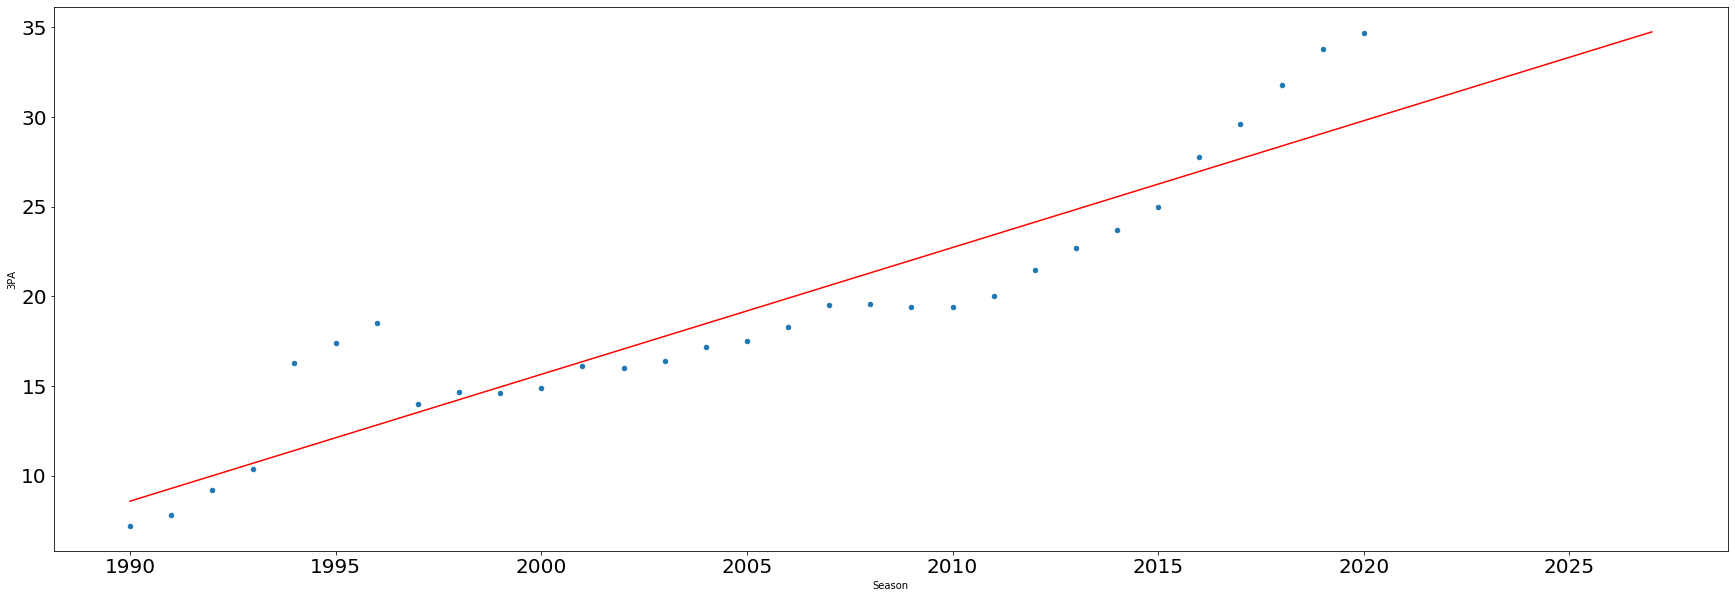

In [7]:
X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_new["Season"] = np.linspace(1990, 2027, num=100)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    model.predict(X_new), # y values in Series.plot.line()
    index=X_new["Season"]    # x values in Series.plot.line()
)

# plot the data, then the model
t_train.plot.scatter(x="Season", y="3PA", figsize = (30,30),fontsize = 20)
y_new_.plot.line(figsize = (30,10),fontsize = 20, color="red")